In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [23]:
setosa = df[df['species'] == 'setosa']['petal length (cm)']
versicolor = df[df['species'] == 'versicolor']['petal length (cm)']
virginica = df[df['species'] == 'virginica']['petal length (cm)']

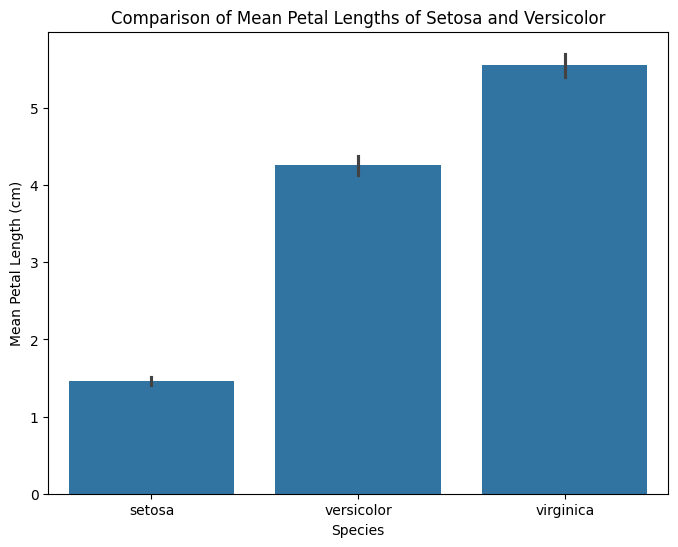

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='species', y='petal length (cm)', data=df)
plt.title('Comparison of Mean Petal Lengths of Setosa and Versicolor')
plt.xlabel('Species')
plt.ylabel('Mean Petal Length (cm)')
plt.show()

In [18]:
setosa.describe()

,petal length (cm)
count,50.000000
mean,1.462000
std,0.173664
min,1.000000
25%,1.400000
50%,1.500000
75%,1.575000
max,1.900000


In [19]:
versicolor.describe()

,petal length (cm)
count,50.000000
mean,4.260000
std,0.469911
min,3.000000
25%,4.000000
50%,4.350000
75%,4.600000
max,5.100000


# **T - Test**

In [16]:
t_statistic, p_value = stats.ttest_ind(setosa, versicolor)

In [17]:
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in mean petal lengths between Setosa and Versicolor.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean petal lengths between Setosa and Versicolor.")

T-statistic: -39.492719391538095
P-value: 5.404910513441677e-62
Reject the null hypothesis. There is a significant difference in mean petal lengths between Setosa and Versicolor.


# **Z - Test**

In [28]:
len(virginica) #n>30

50

In [24]:
virginica.describe()

,petal length (cm)
count,50.000000
mean,5.552000
std,0.551895
min,4.500000
25%,5.100000
50%,5.550000
75%,5.875000
max,6.900000


In [43]:
sepal_length_virginica = df[df['species'] == 'virginica']['sepal length (cm)']

m = 5.0  # Hypothesized mean
sigma = np.std(sepal_length_virginica) # Population standard deviation or sample standard deviation if n>30

In [44]:
z_statistic, p_value = stats.ttest_1samp(sepal_length_virginica, m)

In [45]:
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. The mean sepal length of Virginica is not equal to 5.0.")
else:
  print("Fail to reject the null hypothesis. The mean sepal length of Virginica is equal to 5.0.")

Z-statistic: 17.65877660489134
P-value: 6.931208242966885e-23
Reject the null hypothesis. The mean sepal length of Virginica is not equal to 5.0.


# **ANOVA**

In [31]:
setosa_pw = df[df['species'] == 'setosa']['petal width (cm)']
versicolor_pw = df[df['species'] == 'versicolor']['petal width (cm)']
virginica_pw = df[df['species'] == 'virginica']['petal width (cm)']

In [32]:
f_statistic, p_value = stats.f_oneway(setosa_pw, versicolor_pw, virginica_pw)

In [33]:
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant difference in mean petal widths across the three species.")
else:
  print("Fail to reject the null hypothesis. There is no significant difference in mean petal widths across the three species.")

F-statistic: 960.007146801809
P-value: 4.169445839443116e-85
Reject the null hypothesis. There is a significant difference in mean petal widths across the three species.


# **Correlation between sepal length and petal length**

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pearson Correlation Coefficient: 0.8717537758865831


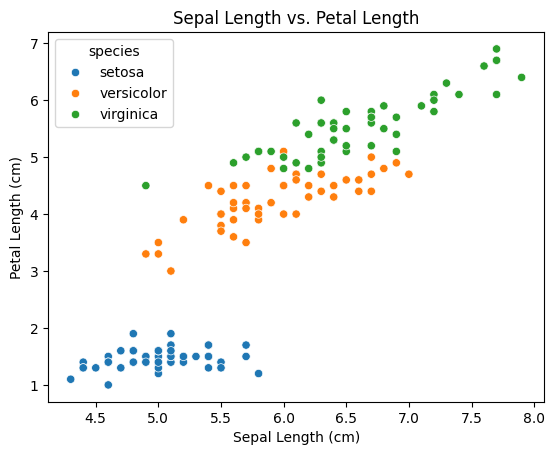

In [42]:
#correlation coefficient
correlation = df['sepal length (cm)'].corr(df['petal length (cm)'])
print('Pearson Correlation Coefficient:', correlation)


sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df, hue='species')
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()